1. Imports

In [2]:
!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

2. Load the dataset

In [4]:
# Load the dataset
df = pd.read_csv("../data/raw/stroke_data.csv")

# Display first few rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


3. Define target and input features

In [5]:
# Define target and features
X = df.drop("stroke", axis=1)
y = df["stroke"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (5110, 11)
Target shape: (5110,)


4. Check missing values again (sanity check)

In [6]:
# Check missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

5. Apply BMI imputation

In [7]:
# Impute missing BMI values with median
bmi_median = df["bmi"].median()
df["bmi"].fillna(bmi_median, inplace=True)

# Verify missing values again
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

5.1 Create BMI category feature based in WHO standards

In [12]:
# Create BMI Category feature based on WHO standards
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df['bmi_category'] = df['bmi'].apply(bmi_category)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Overweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal


6. Identify categorical columns

In [13]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status', 'bmi_category'],
      dtype='object')

7. Apply One-Hot Encoding

In [14]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_category_Obese,bmi_category_Overweight,bmi_category_Underweight
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,...,1,0,0,1,1,0,0,1,0,0
1,51676,61.0,0,0,202.21,28.1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,...,1,0,0,0,0,1,0,1,0,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,...,1,0,0,1,0,0,1,1,0,0
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0


8. Save cleaned and ML-ready datasets

In [16]:
# Save cleaned dataset (after missing value handling)
df.to_csv("../data/processed/stroke_cleaned.csv", index=False)

# Save ML-ready dataset (after encoding)
df_encoded.to_csv("../data/processed/stroke_ml_ready.csv", index=False)

print("Processed datasets saved successfully.")

Processed datasets saved successfully.


9. Separate features and target again

In [17]:
# Separate features and target from encoded data
X = df_encoded.drop("stroke", axis=1)
y = df_encoded["stroke"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (5110, 20)
y shape: (5110,)


10. Perform Train-Test Split

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (4088, 20)
Test set size: (1022, 20)


11. Import scaler

In [19]:
from sklearn.preprocessing import StandardScaler

12. Fit scaler on training data and transform test data

In [20]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using same scaler
X_test_scaled = scaler.transform(X_test)

13. Import Logistic Regression and Random forest model

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

14. Initialize and train the models

In [22]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

# Train the models
log_reg.fit(X_train_scaled, y_train)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

15. Make predictions on test data

In [33]:
# Predict class labels - Logistic Regression
y_pred_lr = log_reg.predict(X_test_scaled)

# Predict probabilities - Logistic Regression
y_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

# Predict class labels - Random Forest
y_pred_rf = rf_model.predict(X_test)

# Predict probabilities - Random Forest
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

17. Accuracy calculation

In [34]:
# Accuracy for Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy for Logistic Regression Model:", accuracy_lr)

# Accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy for Random Forest Model:", accuracy_rf)

Accuracy for Logistic Regression Model: 0.9530332681017613
Accuracy for Random Forest Model: 0.949119373776908


18. Confusion Matrix

In [35]:
print("confusion matrix for Logistic Regression")
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lr

confusion matrix for Logistic Regression


array([[972,   0],
       [ 48,   2]], dtype=int64)

In [36]:
print("confusion matrix for Random Forest")
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

confusion matrix for Random Forest


array([[970,   2],
       [ 50,   0]], dtype=int64)

19. Classification Report

In [37]:
print("Classifaction report for Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Classification report for Random Forest")
print(classification_report(y_test, y_pred_rf))

Classifaction report for Logistic Regression
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.04      0.08        50

    accuracy                           0.95      1022
   macro avg       0.98      0.52      0.53      1022
weighted avg       0.96      0.95      0.93      1022

Classification report for Random Forest
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



20. ROC-AUC Score

In [42]:
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print("ROC-AUC Score for logistic regression:", roc_auc_lr)

roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("ROC-AUC Score for random forest:", roc_auc_rf)

ROC-AUC Score for logistic regression: 0.8453086419753086
ROC-AUC Score for random forest: 0.7911831275720165


21.1 ROC Curve Plot - Logistic Regression

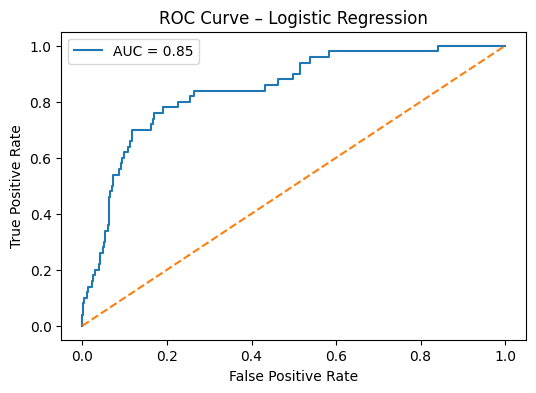

In [40]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_lr:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()

21.2 ROC Curve Plot - Random Forest

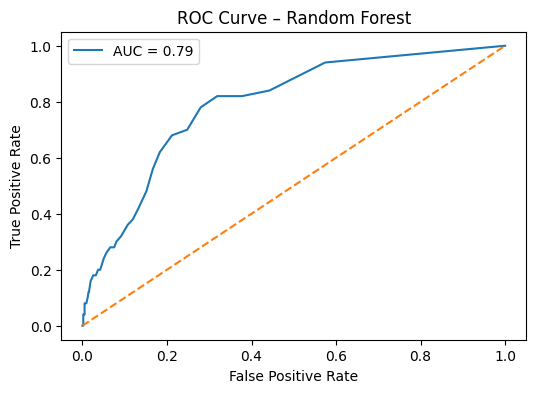

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_rf:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()

22. Comparison Table - Logistic Regression Vs Random Forest

In [43]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_lr, accuracy_rf],
    "ROC-AUC": [roc_auc_lr, roc_auc_rf]
})

comparison_df

,Model,Accuracy,ROC-AUC
0,Logistic Regression,0.953033,0.845309
1,Random Forest,0.949119,0.791183


23. Save model, scaler, and columns

In [44]:
import joblib

# Save trained Logistic Regression model
joblib.dump(log_reg, "../models/logistic_regression_model.pkl")

# Save scaler
joblib.dump(scaler, "../models/standard_scaler.pkl")

# Save feature column names
joblib.dump(X_train.columns.tolist(), "../models/feature_columns.pkl")


['../models/feature_columns.pkl']